In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats
import cufflinks as cf
import plotly.express as px

In [ ]:
diamonds=pd.read_csv("/Users/luisdemiguel/Desktop/Ironhack/ih_datamadpt0420_project_m2/data/diamonds_train.csv")

In [ ]:
#Interesting facts about diamonds:
    # 1. x=width
    # 2. y=lenght
    # 3. z=depth
    # 4. x+y=average diameter (this will give you the shape)
    # 5. average diameter/depth= total depth (here just depth) % of a diamond
    # 6. table = its the % of width of the table/total width
    

In [135]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,shape,cm3,price_per_cut
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25,0.994143,0.197097,NaN
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75,1.006897,0.052396,NaN
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65,0.983986,0.113437,NaN
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00,1.008547,0.066269,NaN
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95,0.993893,0.168430,NaN


In [136]:
diamonds['shape'] = diamonds['y']/diamonds['x']

#http://www.mysolitaire.com/knowledge-center/diamond_guide/diamond_guide_cut_diamond_length_width.html

In [137]:
diamonds['cm3'] = ((diamonds['x']/10)*(diamonds['y']/10)*(diamonds['z']/10))

In [138]:
shape = diamonds['shape'].tolist()

In [139]:
diamonds.corr()
#we can observe that the correlation between the price and the carat (0.922) is stronger than the one with the width, lenght and depth (around 0.898)
#this would mean that the weighted corr for price is 50,65% for the carat and 49,35% for the size

,carat,depth,table,price,x,y,z,shape,cm3,price_per_cut
carat,1.000000,0.026528,0.183392,0.921935,0.975688,0.951667,0.967570,-0.034681,0.971851,NaN
depth,0.026528,1.000000,-0.293114,-0.014864,-0.026348,-0.030966,0.094655,-0.027211,0.006721,NaN
table,0.183392,-0.293114,1.000000,0.130111,0.196059,0.184673,0.155189,-0.044940,0.168437,NaN
price,0.921935,-0.014864,0.130111,1.000000,0.885848,0.866163,0.874500,-0.019951,0.898684,NaN
x,0.975688,-0.026348,0.196059,0.885848,1.000000,0.973712,0.984876,-0.041802,0.952303,NaN
y,0.951667,-0.030966,0.184673,0.866163,0.973712,1.000000,0.964828,0.184478,0.977860,NaN
z,0.967570,0.094655,0.155189,0.874500,0.984876,0.964828,1.000000,-0.014443,0.953983,NaN
shape,-0.034681,-0.027211,-0.044940,-0.019951,-0.041802,0.184478,-0.014443,1.000000,0.180464,NaN
cm3,0.971851,0.006721,0.168437,0.898684,0.952303,0.977860,0.953983,0.180464,1.000000,NaN
price_per_cut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [169]:
simulation_average = diamonds.groupby(['color','cut'])['price'].mean().reset_index()

In [170]:
type(simulation_average)

pandas.core.frame.DataFrame

In [171]:
simulation_average.head()

,color,cut,price
0,D,Fair,4352.748031
1,D,Good,3311.693089
2,D,Ideal,2579.709647
3,D,Premium,3638.838961
4,D,Very Good,3468.689008


In [141]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,shape,cm3,price_per_cut
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25,0.994143,0.197097,NaN
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75,1.006897,0.052396,NaN
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65,0.983986,0.113437,NaN
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00,1.008547,0.066269,NaN
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95,0.993893,0.168430,NaN


In [142]:
rounds = []
marquise = []
oval = []
heart = []
good = []
not_good_excellent = []


for i in shape:
    if 1.05 <= i < 1.15:
        rounds.append(i)
    elif 1.7 <= i < 2.30:
        marquise.append(i)
    elif 1.3 <= i < 1.7:
        oval.append(i)
    elif 1.15 <= i < 1.3:
        heart.append(i)
    elif 1.005 <= i < 1.05:
        good.append(i)
    else:
        not_good_excellent.append(i)



In [143]:
diamonds.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z,shape,cm3,price_per_cut
count,40455.000000,40455,40455,40455,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,4.045100e+04,40455.000000,0.0
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16220,8455,9749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797706,NaN,NaN,NaN,61.752841,57.446133,3928.444469,5.729392,5.732819,3.537154,inf,0.129802,NaN
std,0.475544,NaN,NaN,NaN,1.431725,2.233535,3992.416147,1.124453,1.146650,0.697062,NaN,0.078904,NaN
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,6.189759e-01,0.000000,NaN
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000,9.931193e-01,0.064890,NaN
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2397.000000,5.690000,5.710000,3.520000,1.004283e+00,0.114689,NaN
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5331.000000,6.540000,6.540000,4.035000,1.007449e+00,0.170845,NaN


In [181]:
diamonds.dtypes

carat            float64
cut               object
color             object
clarity           object
depth            float64
table            float64
price              int64
x                float64
y                float64
z                float64
shape            float64
cm3              float64
price_per_cut    float64
dtype: object

In [144]:
set_matplotlib_formats('svg')

%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1adf3b70>,
      dtype=object)

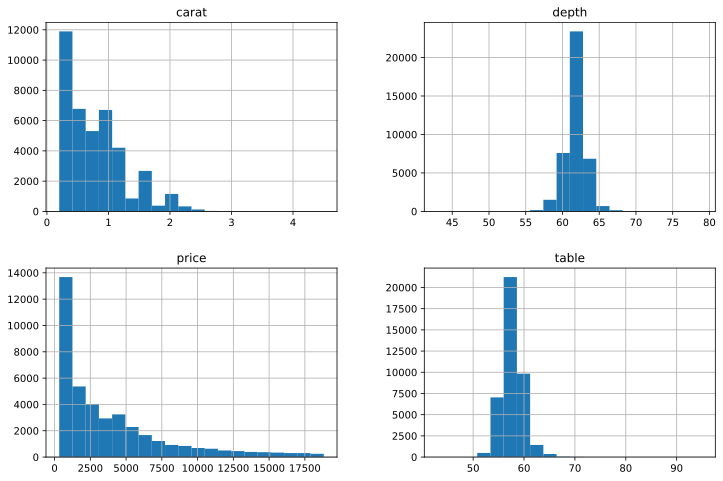

In [156]:
# A first look and feel of the data
diamonds[['carat','table','depth','price']].hist(figsize=(12, 8), bins=20)

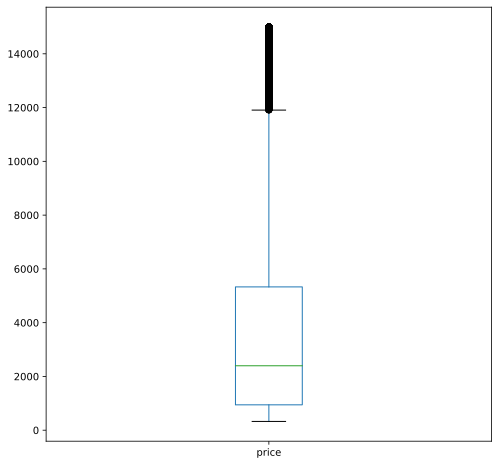

In [157]:
#a closer look at the price
#we can see that most of them go from 1k to 5k
#we can also see that the distribution after 12k its marginal, hence seems like its rare and unique to find diamonds with more than 12k price. Up to 18.8k (the max)

diamonds[['price']].clip(0, 15000).plot(kind='box', figsize=(8, 8))

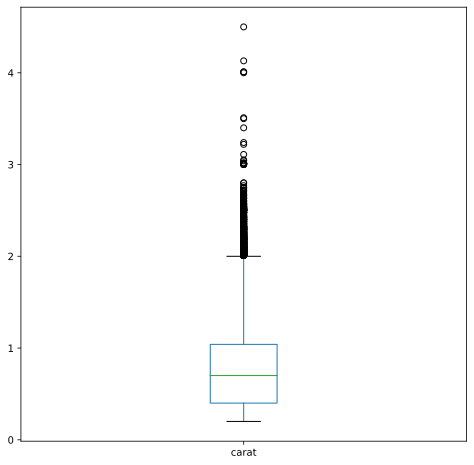

In [158]:
diamonds[['carat']].clip(0, 400).plot(kind='box', figsize=(8, 8))

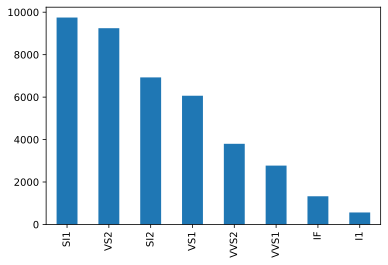

In [159]:
#i chose this kind of barplot for items like colors, clarity or cut with few options.
#we can see for example that the spread in clarity is notorious, from less than 1k for L1 to around 10k in SL1 
diamonds['clarity'].value_counts().plot.bar();

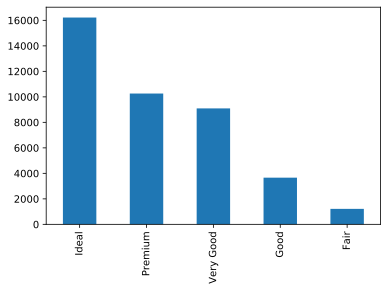

In [160]:
#we can see for example that the spread in cut is large as well, from less than 1k for "fair" to around 16k in "ideal" 
diamonds['cut'].value_counts().plot.bar();

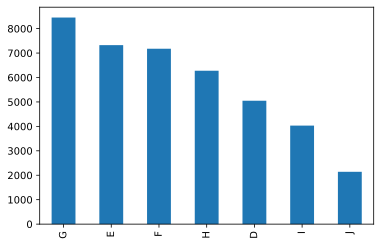

In [161]:
diamonds['color'].value_counts().plot.bar();

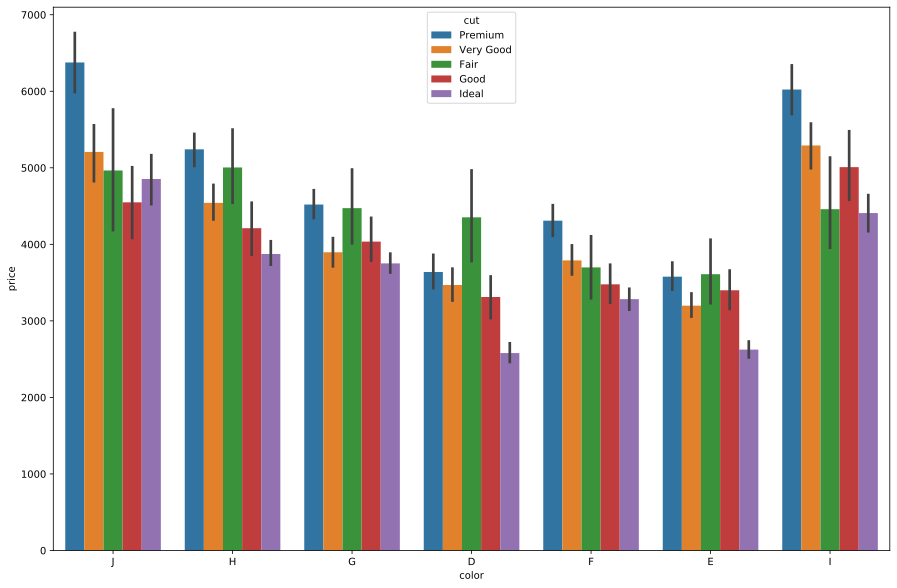

In [177]:
fig = plt.figure(figsize=(15, 10))
ax = sns.barplot(x='color', y='price', hue='cut', data=diamonds)

Together with the previous chart, we can observe:
#1. in terms of "cut", that the premium is the most expensive but the 2nd in terms of count.
    #this means that they rather produce or make premium cut. Seems like is worth the revenue compared to other "cut" options
#2. in terms of "color", being "J" and "I" the ones with less count but at the same time with the highest average in price, most probably because of being uniques

AttributeError: 'Rectangle' object has no property 'ytitle'

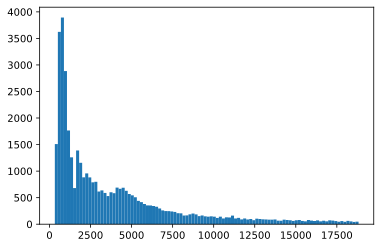

In [172]:
#diamonds['price'].plot(kind='hist', title='price', yTitle='price', xTitle='carat', bins=100)

In [173]:
px.histogram(data_frame=diamonds, 
             x='price', 
             color='cut', 
             histnorm='percent', 
             barmode='overlay',
             title='prices per cut',
             nbins=10)

Here we can see that surprisingly, the "ideal" cut is the base of the piramid for every range in prices.
from there, we can see also that the influence of the premium cut which is the "most expensive" class for all the different colors
  
But at the same time the second one more produced its the 2nd cut with more "weight" in the 4 to 8k ranges (and not only in the most expensive ones)

In [ ]:
diamonds.corr().plot(kind='heatmap',colorscale="Blues",title="Correlation Matrix")

In [176]:
diamonds.iplot(kind="scatter", theme="white",x="carat",y="price",
            categories="cut")

/Users/luisdemiguel/miniconda3/envs/ihm1_env/lib/python3.7/site-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/Users/luisdemiguel/miniconda3/envs/ihm1_env/lib/python3.7/site-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



PlotlyRequestError: Authentication credentials were not provided.